In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Billboard Top 100

In [2]:
billboard = pd.read_csv("/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/billboard_hot100.csv")

In [3]:
billboard.head()

,song_title,artist
0,All I Want For Christmas Is You,Mariah Carey
1,Last Christmas,Wham!
2,Rockin' Around The Christmas Tree,Brenda Lee
3,Jingle Bell Rock,Bobby Helms
4,Golden,"HUNTR/X: EJAE, Audrey Nuna & REI AMI"


In [4]:
billboard.duplicated().sum()

np.int64(0)

In [40]:
billboard.artist.value_counts()

artist
Olivia Dean                                     5
Taylor Swift                                    5
Tate McRae                                      3
Justin Bieber                                   3
sombr                                           2
                                               ..
Gene Autry                                      1
Elvis Presley                                   1
Eartha KittWith Henri Rene And His Orchestra    1
Nat King Cole                                   1
Taylor SwiftFeaturingSabrina Carpenter          1
Name: count, Length: 81, dtype: int64

In [5]:
billboard.isna().sum()

song_title    0
artist        0
dtype: int64

# Audio Features

In [6]:
features = pd.read_csv('/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/audio_features_dataset_curated.csv', sep=';')

features.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.00,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.00,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.12,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.00,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.00,119.949,4


In [7]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43000 entries, 0 to 42999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          43000 non-null  object 
 1   artists           42999 non-null  object 
 2   album_name        42999 non-null  object 
 3   track_name        42999 non-null  object 
 4   popularity        43000 non-null  int64  
 5   duration_ms       43000 non-null  int64  
 6   explicit          43000 non-null  bool   
 7   danceability      43000 non-null  float64
 8   energy            43000 non-null  float64
 9   key               43000 non-null  int64  
 10  loudness          43000 non-null  float64
 11  mode              43000 non-null  int64  
 12  speechiness       43000 non-null  float64
 13  acousticness      43000 non-null  float64
 14  instrumentalness  43000 non-null  float64
 15  liveness          43000 non-null  float64
 16  valence           43000 non-null  float6

In [8]:
features.shape

(43000, 19)

In [9]:
duplicates = features.duplicated().sum() 
length = len(features)

pct = duplicates / length * 100

pct

np.float64(19.248837209302323)

In [14]:
features.duplicated().sum() 

np.int64(8277)

In [10]:
print(f"Total rows: {len(features)}")
print(f"Unique track_ids: {features['track_id'].nunique()}")
print(f"Unique track_names: {features['track_name'].nunique()}")

# Check for exact duplicate rows
exact_dupes = features.duplicated().sum()
print(f"Exact duplicate rows: {exact_dupes}")

# Check for duplicate track_ids specifically
id_dupes = features.duplicated(subset=['track_id']).sum()
print(f"Duplicate track_ids: {id_dupes}")

Total rows: 43000
Unique track_ids: 34478
Unique track_names: 27352
Exact duplicate rows: 8277
Duplicate track_ids: 8522


In [ ]:
# Drop duplicates based on track_id, keep first occurrence
features = features.drop_duplicates(subset=['track_id']) # keeps one row per unique song

print(f"Rows after deduplication: {len(features)}")

Rows after deduplication: 34477


In [19]:
features = features.dropna(axis=0)

In [20]:
features.isna().sum()

track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [21]:
features.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,676.00,461.0000,1,-6.746,0,143.0000,0.0322,0.000001,358.0000,715.00,87.917,4
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.42,166.0000,1,-17.235,1,0.0763,924.0000,0.000006,101.0000,267.00,77.489,4
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,438.00,359.0000,0,-9.734,1,0.0557,0.2100,0.000000,117.0000,0.12,76.332,4
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,266.00,0.0596,0,-18.515,1,0.0363,905.0000,0.000071,132.0000,143.00,181.740,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,618.00,443.0000,2,-9.681,1,0.0526,469.0000,0.000000,0.0829,167.00,119.949,4


In [22]:
features.danceability.describe()

count    34477.000000
mean       514.653569
std        231.234616
min          0.000000
25%        406.000000
50%        557.000000
75%        683.000000
max        975.000000
Name: danceability, dtype: float64

<Axes: xlabel='danceability', ylabel='instrumentalness'>

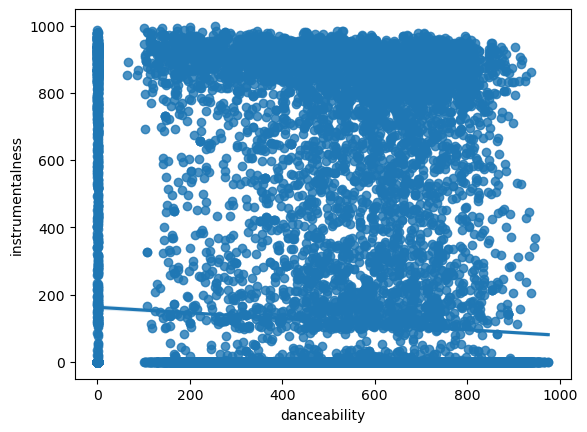

In [42]:
sns.regplot(x="danceability",
            y="instrumentalness",
            data=features)

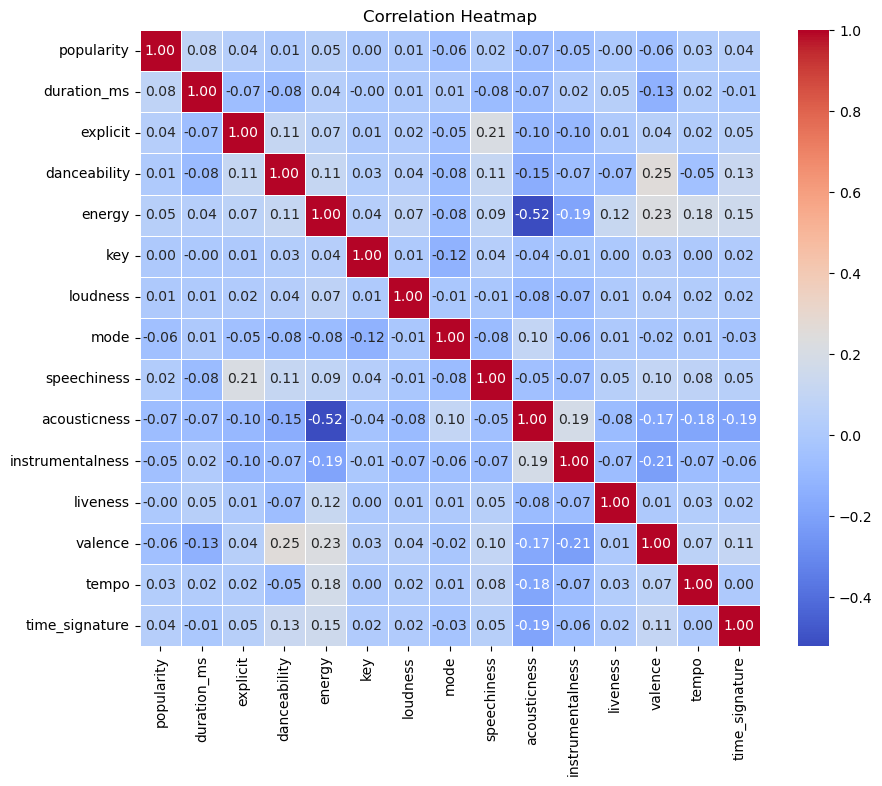

In [ ]:
corr = features.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [49]:
features = pd.get_dummies(features, columns=["explicit"], dtype=int)

In [51]:
features.to_csv("/Users/chandlershortlidge/Desktop/Ironhack/DA_FT_Extra_Week10/data/audio_features_clean.csv", index=False)